In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_pickle("pipeline_ready_df.pkl")

In [3]:
df.head(50)

Education  Marital_Status_Together  Marital_Status_Single  \
0           2                        0                      1   
1           2                        0                      1   
2           2                        1                      0   
3           2                        1                      0   
4           4                        0                      0   
5           3                        1                      0   
6           2                        0                      0   
7           4                        0                      0   
8           4                        1                      0   
9           4                        1                      0   
10          2                        0                      0   
11          0                        0                      0   
12          2                        0                      0   
13          3                        0                      0   
14          2                        0                      0   
15          4                        0                      1   
16          2                        0                      0   
17          2                        1                      0   
18          3                        0                      0   
19          1                        0                      1   
20          2                        0                      0   
21          2                        0                      0   
22          4                        0                      0   
23          4                        0                      0   
24          2                        1                      0   
25          2                        0                      1   
26          2                        0                      0   
27          2                        0                      1   
28          2                        0                      0   
29          4                        0                      0   
30          3                        0                      0   
31          3                        1                      0   
32          2                        1                      0   
33          4                        0                      0   
34          3                        0                      0   
35          3                        0                      1   
36          4                        0                      0   
37          1                        0                      0   
38          2                        0                      0   
39          4                        0                      0   
40          2                        0                      0   
41          3                        0                      0   
42          2                        1                      0   
43          4                        0                      1   
44          3                        0                      0   
45          2                        0                      1   
46          1                        0                      0   
47          2                        1                      0   
48          2                        0                      1   
49          4                        0                      0   

    Marital_Status_Divorced  Marital_Status_Widow  Marital_Status_Others  Age  \
0                         0                     0                      0   68   
1                         0                     0                      0   71   
2                         0                     0                      0   60   
3                         0                     0                      0   41   
4                         0                     0                      0   44   
5                         0                     0                      0   58   
6                         1                     0                      0   54   
7                         0             

In [4]:
df.columns

Index(['Education', 'Marital_Status_Together', 'Marital_Status_Single',
       'Marital_Status_Divorced', 'Marital_Status_Widow',
       'Marital_Status_Others', 'Age', 'Income', 'Children', 'Customer_Tenure',
       'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold',
       'Discount_Purchase', 'Web_Purchase', 'Catalog', 'Store_Purchase',
       'Website_Visit', 'Complain', 'Total_Promo', 'Total_Spending'],
      dtype='object')

In [5]:
numeric_cols = [cols for cols in df.columns if df[cols].dtypes != 'object']
print(f"No. of Numeric Features: {len(numeric_cols)}")

No. of Numeric Features: 25


In [6]:
categorical_cols = [cols for cols in df.columns if df[cols].dtypes == 'object']
print(f"No. of Categorical Features: {len(categorical_cols)}")

No. of Categorical Features: 0


In [7]:
discrete_cols = [cols for cols in df.columns if len(df[cols].unique()) <=25]
print(f"No. of discrete Features: {len(discrete_cols)}")
discrete_cols

No. of discrete Features: 14


['Education',
 'Marital_Status_Together',
 'Marital_Status_Single',
 'Marital_Status_Divorced',
 'Marital_Status_Widow',
 'Marital_Status_Others',
 'Children',
 'Discount_Purchase',
 'Web_Purchase',
 'Catalog',
 'Store_Purchase',
 'Website_Visit',
 'Complain',
 'Total_Promo']

In [8]:
continous_cols = [cols for cols in df.columns if cols not in discrete_cols]
continous_cols

['Age',
 'Income',
 'Customer_Tenure',
 'Recency',
 'Wines',
 'Fruits',
 'Meat',
 'Fish',
 'Sweet',
 'Gold',
 'Total_Spending']

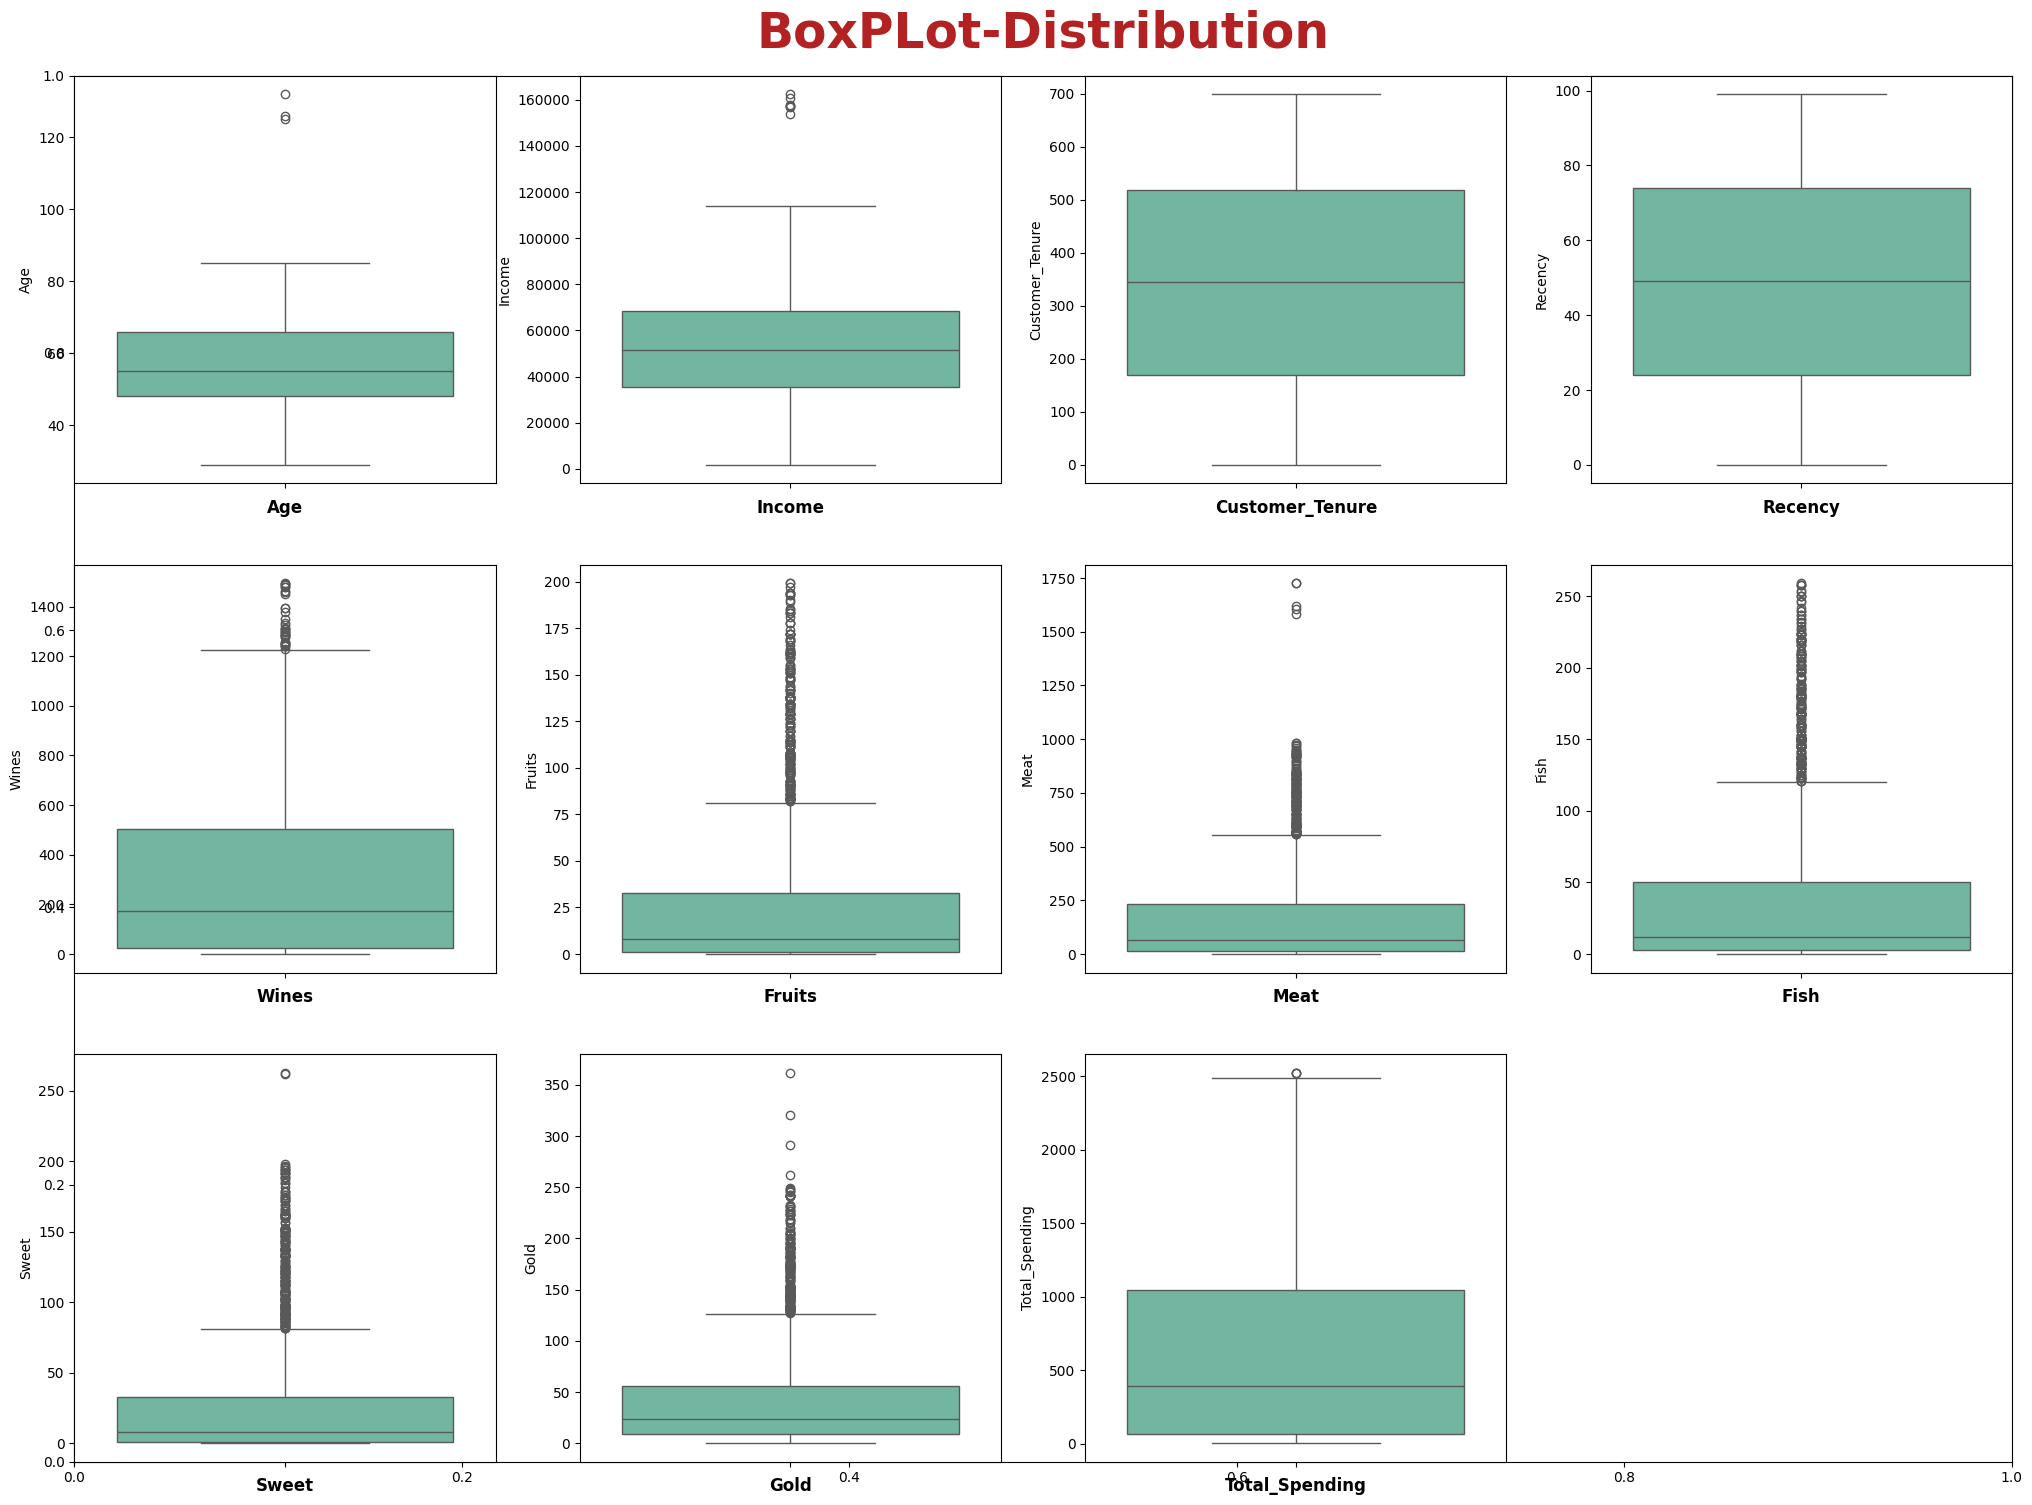

In [9]:
plt.figure(figsize=(25,18))


plt.title('BoxPLot-Distribution', weight='bold', pad=20, fontsize=35, color='firebrick')

for i in range(len(continous_cols)):
    plt.subplot(3,4,i+1)
    sns.boxplot(df[continous_cols[i]], palette='Set2')
    plt.xlabel(continous_cols[i], weight='semibold', fontsize=12)

plt.show()    

Reports:

# As per the chart, Customer_Tenure and Receny has no outliers Present.
# But there are bunch of Outliers in Wines, Fruits, Meat, Fish, Sweet, Gold.
# And, Age, Income, Total_spending has few Outliers

In [10]:
#detecting outliers and clapping it

def detect_outliers(cols):
   Q1 = df[cols].quantile(0.25)
   Q3 = df[cols].quantile(0.75)
   print(f"\n### {cols} ###")

   IQR = Q3-Q1
   lower_bound = Q1 - 1.5 * IQR
   upper_bound = Q3 + 1.5 * IQR

   print("Upper-Limit",upper_bound)
   print("Lower-Limit",lower_bound)

   df[cols] = df[cols].clip(lower=lower_bound, upper=upper_bound)



In [11]:
for col in continous_cols:
         detect_outliers(col)


### Age ###
Upper-Limit 93.0
Lower-Limit 21.0

### Income ###
Upper-Limit 117393.5
Lower-Limit -13582.5

### Customer_Tenure ###
Upper-Limit 1041.25
Lower-Limit -352.75

### Recency ###
Upper-Limit 149.0
Lower-Limit -51.0

### Wines ###
Upper-Limit 1225.25
Lower-Limit -696.75

### Fruits ###
Upper-Limit 81.0
Lower-Limit -47.0

### Meat ###
Upper-Limit 556.0
Lower-Limit -308.0

### Fish ###
Upper-Limit 120.5
Lower-Limit -67.5

### Sweet ###
Upper-Limit 81.0
Lower-Limit -47.0

### Gold ###
Upper-Limit 126.5
Lower-Limit -61.5

### Total_Spending ###
Upper-Limit 2511.5
Lower-Limit -1396.5


In [12]:
outlier_features = [
    "Wines", "Fruits", "Meat", "Fish", "Sweet", "Gold",
    "Total_Spending",
    "Income",  # skewed, likely needs power transform
]


In [13]:
# Step 1: Clip outliers
for col in outlier_features:
    detect_outliers(col)

# Step 2: Define columns
numeric_cols = [col for col in df.select_dtypes(include=['int64','float64']).columns
                if col not in outlier_features]


### Wines ###
Upper-Limit 1225.25
Lower-Limit -696.75

### Fruits ###
Upper-Limit 81.0
Lower-Limit -47.0

### Meat ###
Upper-Limit 556.0
Lower-Limit -308.0

### Fish ###
Upper-Limit 120.5
Lower-Limit -67.5

### Sweet ###
Upper-Limit 81.0
Lower-Limit -47.0

### Gold ###
Upper-Limit 126.5
Lower-Limit -61.5

### Total_Spending ###
Upper-Limit 2511.5
Lower-Limit -1396.5

### Income ###
Upper-Limit 117393.5
Lower-Limit -13582.5


In [14]:
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy='constant', fill_value=0)),
    ("scale", StandardScaler())
])

outlier_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy='constant', fill_value=0)),
    ("power", PowerTransformer(standardize=True))
])

preprocessor = ColumnTransformer([
    ("num", num_pipeline, numeric_cols),
    ("out", outlier_pipeline, outlier_features)
], remainder='passthrough')

# Apply transformation
transformed = preprocessor.fit_transform(df)
cols = preprocessor.get_feature_names_out()
scaled_data = pd.DataFrame(transformed, columns=cols)

In [15]:
scaled_data

num__Education  num__Marital_Status_Together  \
0          -0.458506                     -0.590589   
1          -0.458506                     -0.590589   
2          -0.458506                      1.693225   
3          -0.458506                      1.693225   
4           1.532950                     -0.590589   
...              ...                           ...   
2234       -0.458506                     -0.590589   
2235        1.532950                      1.693225   
2236       -0.458506                     -0.590589   
2237        0.537222                      1.693225   
2238        1.532950                     -0.590589   

      num__Marital_Status_Single  num__Marital_Status_Divorced  \
0                       1.914310                     -0.339993   
1                       1.914310                     -0.339993   
2                      -0.522381                     -0.339993   
3                      -0.522381                     -0.339993   
4                      -0.522381                     -0.339993   
...                          ...                           ...   
2234                   -0.522381                     -0.339993   
2235                   -0.522381                     -0.339993   
2236                   -0.522381                      2.941235   
2237                   -0.522381                     -0.339993   
2238                   -0.522381                     -0.339993   

      num__Marital_Status_Widow  num__Marital_Status_Others  num__Age  \
0                      -0.18872                   -0.056002  1.006638   
1                      -0.18872                   -0.056002  1.261513   
2                      -0.18872                   -0.056002  0.326970   
3                      -0.18872                   -0.056002 -1.287239   
4                      -0.18872                   -0.056002 -1.032364   
...                         ...                         ...       ...   
2234                   -0.18872                   -0.056002  0.157054   
2235                   -0.18872                   -0.056002  1.941180   
2236                   -0.18872                   -0.056002 -1.032364   
2237                   -0.18872                   -0.056002  1.091596   
2238                   -0.18872                   -0.056002  1.261513   

      num__Children  num__Customer_Tenure  num__Recency  ...  num__Complain  \
0         -1.264195             -1.530940      0.306624  ...      -0.097304   
1          1.396080              1.190204     -0.384051  ...      -0.097304   
2         -1.264195              0.205644     -0.798456  ...      -0.097304   
3          0.065942              1.061568     -0.798456  ...      -0.097304   
4          0.065942              0.952722      1.549838  ...      -0.097304   
...             ...                   ...           ...  ...            ...   
2234       0.065942             -0.135736     -0.107781  ...      -0.097304   
2235       2.726217              1.655272      0.237556  ...      -0.097304   
2236      -1.264195              0.982407      1.446237  ...      -0.097304   
2237       0.065942              0.977460     -1.420063  ...      -0.097304   
2238       1.396080             -1.328091     -0.314983  ...      -0.097304   

      num__Total_Promo  out__Wines  out__Fruits  out__Meat  out__Fish  \
0            -0.439154    1.062459     1.487356   1.504258   1.493675   
1            -0.439154   -1.212223    -1.000773  -1.376518  -0.889084   
2            -0.439154    0.748370     1.145748   0.455847   1.435497   
3            -0.439154   -1.212223    -0.402964  -0.722658  -0.110993   
4            -0.439154    0.122865     1.057991   0.405689   0.831989   
...                ...         ...          ...        ...        ...   
2234         -0.439154    1.153552     1.057991   0.705107   0.771891   
2235          1.035008    0.712148    -1.446177  -0.479862  -1.502202   
2236          1.035008    1.365191     1.131864   0.829190   0.594897   
2237    

In [16]:
from sklearn.metrics import silhouette_score,silhouette_samples
from matplotlib import cm

#This func will create silhouette score for all clusters

def silhouette_plot(model,n_range_clusters,X_clustering,pca,**kwargs):
    for n_clusters in n_range_clusters:
       
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        ax1.set_xlim([-0.1, 1])

        # (n_clusters + 1) *10  is used to create blank space between individual silhouette
        ax1.set_ylim([0, len(X_clustering) + (n_clusters + 1) * 10])

        clusterer = model(n_clusters,**kwargs)
        cluster_labels = clusterer.fit_predict(X_clustering)

        
        silhouette_avg = silhouette_score(X_clustering, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # This calculate silhouette score for every single data-points
        sample_silhouette_values = silhouette_samples(X_clustering, cluster_labels)

        y_lower = 10

        for i in range(n_clusters):
            ith_vals = sample_silhouette_values[cluster_labels == i]
            ith_vals.sort()

            size_cluster_i = ith_vals.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_vals,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            y_lower = y_upper + 10  

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax1.set_yticks([])  # no ticks for y
        ax1.set_xticks([-0.2,-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

 
        # plot-2
        sns.scatterplot(
            x = pca[:, 0],
            y = pca[:, 1],
            hue=cluster_labels,
            palette=sns.color_palette("colorblind", len(set(cluster_labels))),
            alpha=0.7,
            legend="full",
            ax = ax2
        )
        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            f"Silhouette analysis for {model.__name__} clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

In [17]:
from sklearn.decomposition import PCA


df_scaled = scaled_data.copy()
var_ratio = {}

for i in range(2,24):
   pc = PCA(n_components=i)
   df_pca = pc.fit(df_scaled) 
   var_ratio[i] = sum(df_pca.explained_variance_ratio_)

In [18]:
from sklearn.cluster import KMeans

for y in range(2,8):
    print("PCA with # of Components: ",y)
    pca = PCA(n_components=y)
    data_p = pca.fit_transform(df_scaled)

    for x in range(2,7):
        kmeans = KMeans(n_clusters=x,) 
        label = kmeans.fit_predict(data_p)
        print(f'Silhouette Score for {x} Clusters: {silhouette_score(data_p,label)} --- Inertia : {kmeans.inertia_} ')
    print('\n')    

PCA with # of Components:  2
Silhouette Score for 2 Clusters: 0.5414749507774194 --- Inertia : 8166.0460941009915 
Silhouette Score for 3 Clusters: 0.49492645999491963 --- Inertia : 4904.220796132268 
Silhouette Score for 4 Clusters: 0.4282492206717721 --- Inertia : 3952.8651916951853 
Silhouette Score for 5 Clusters: 0.4191037426755876 --- Inertia : 3223.75336326922 
Silhouette Score for 6 Clusters: 0.37025737624725036 --- Inertia : 2758.469639660295 


PCA with # of Components:  3
Silhouette Score for 2 Clusters: 0.46193212590219485 --- Inertia : 11926.327346824108 
Silhouette Score for 3 Clusters: 0.3882481032781919 --- Inertia : 8653.782987551434 
Silhouette Score for 4 Clusters: 0.3253275725842711 --- Inertia : 7356.423965457569 
Silhouette Score for 5 Clusters: 0.297166585254903 --- Inertia : 6382.718841694118 
Silhouette Score for 6 Clusters: 0.2944637375989592 --- Inertia : 5700.236812749961 


PCA with # of Components:  4
Silhouette Score for 2 Clusters: 0.41389263308293 --- I

In [19]:
pca_final = PCA(n_components=2, random_state=1)

reduced = pca_final.fit_transform(df_scaled)
pcadf = pd.DataFrame(reduced)
pcadf.columns=['PC1', 'PC2']

pcadf.head(10)

PC1       PC2
0  3.891288  0.575500
1 -3.443923 -0.756458
2  2.760238 -0.521462
3 -2.750113 -1.167595
4  0.958156  0.376953
5  1.284581  0.677907
6  1.723655  1.227788
7 -1.738151  0.499770
8 -3.405990  0.144335
9 -5.242182  2.177087

In [20]:
pca_final.explained_variance_ratio_

array([0.31982857, 0.08004013])

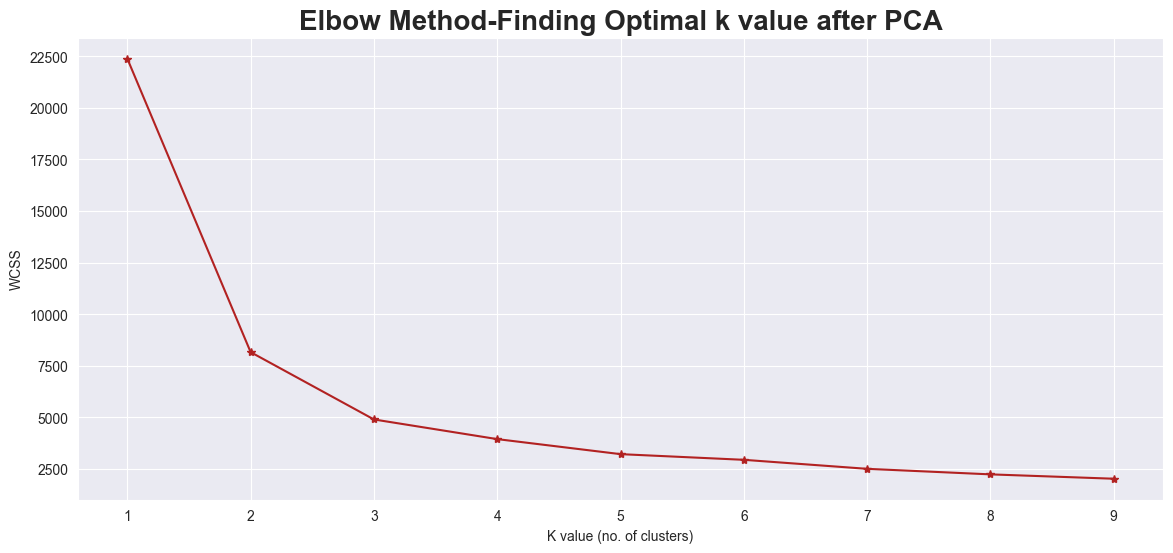

In [21]:
wcss = {}

sns.set_style('darkgrid')
plt.figure(figsize=(14,6))

for i in range(1,10):
    km = KMeans(n_clusters=i)
    km.fit(pcadf)
    wcss[i] = km.inertia_

plt.plot(range(1,10), wcss.values(), marker='*', c='firebrick')
plt.title('Elbow Method-Finding Optimal k value after PCA', fontsize=20, weight='bold')
plt.xlabel('K value (no. of clusters)')
plt.ylabel('WCSS')
plt.show()


Here, the optimal no. of cluster is 3. we can see that after 3 there is no strong decend in wcss values.
Therefore, we will use K = 3

For n_clusters = 2 The average silhouette_score is : 0.5414177136171013
For n_clusters = 3 The average silhouette_score is : 0.4942986262128025
For n_clusters = 4 The average silhouette_score is : 0.4329622619546071
For n_clusters = 5 The average silhouette_score is : 0.4191037426755876
For n_clusters = 6 The average silhouette_score is : 0.37696868484763674


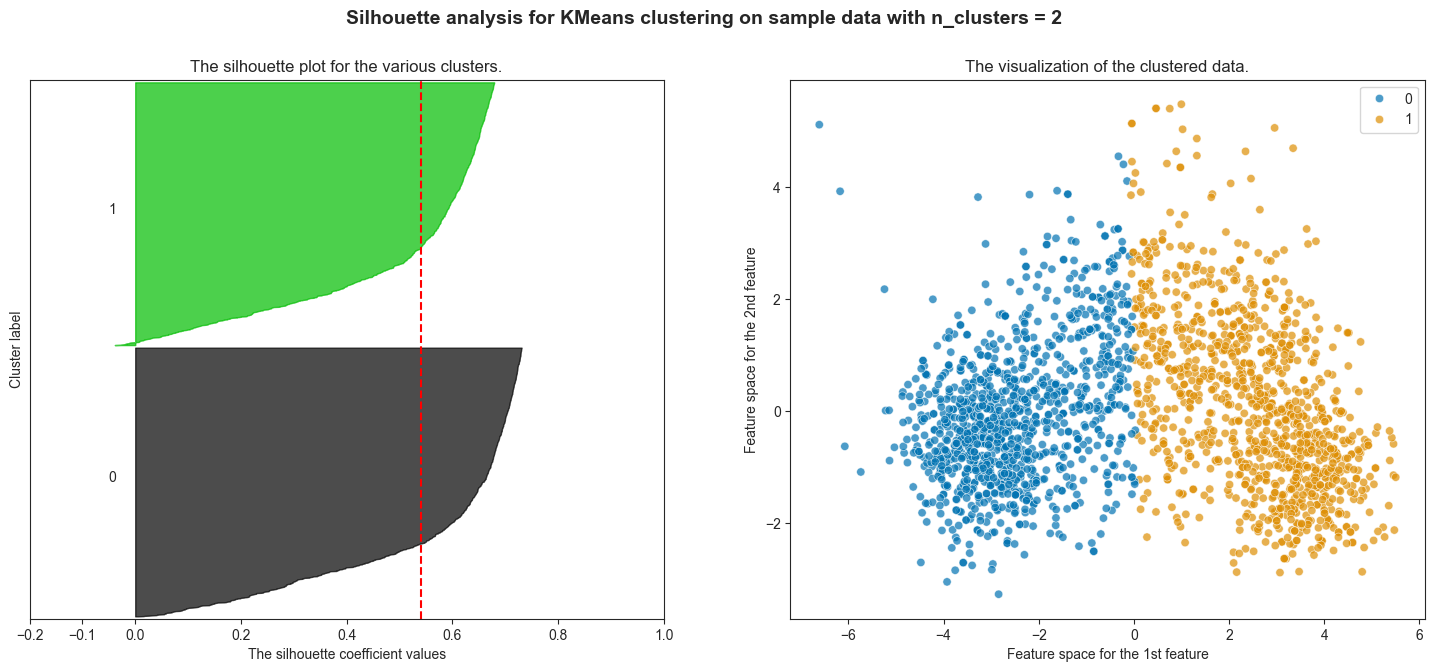

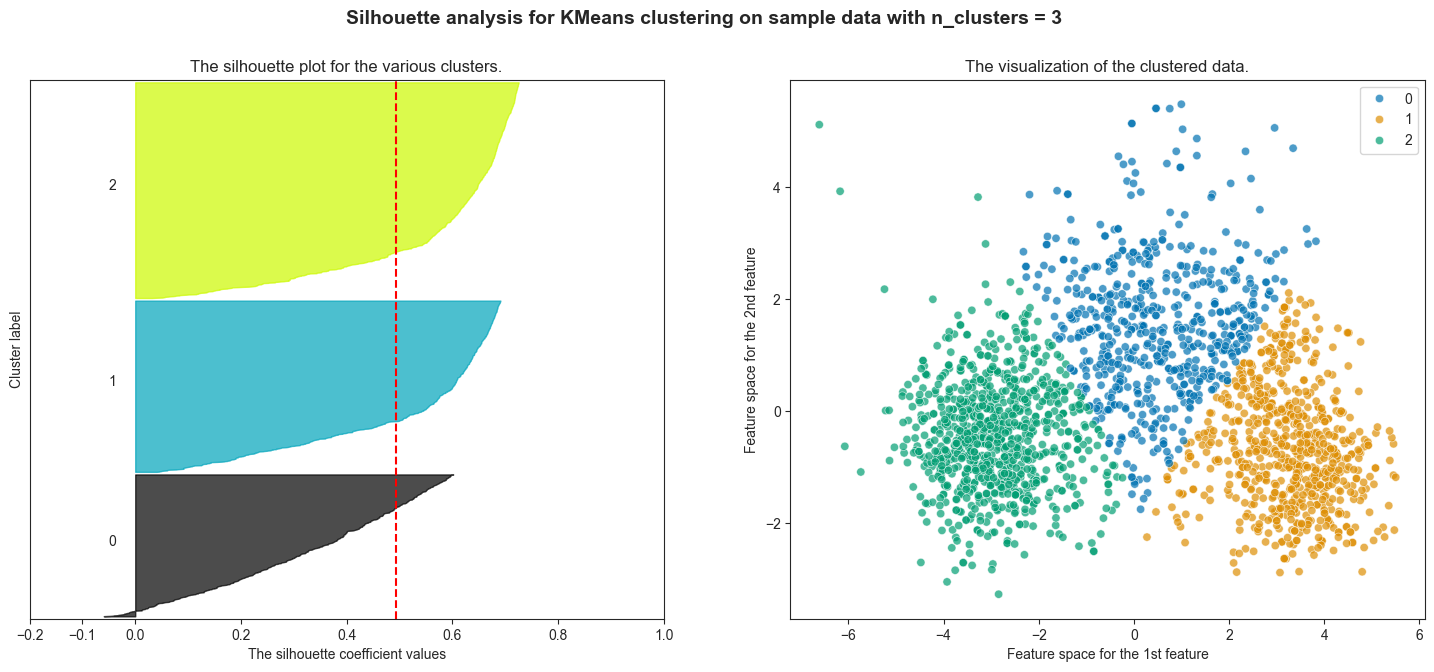

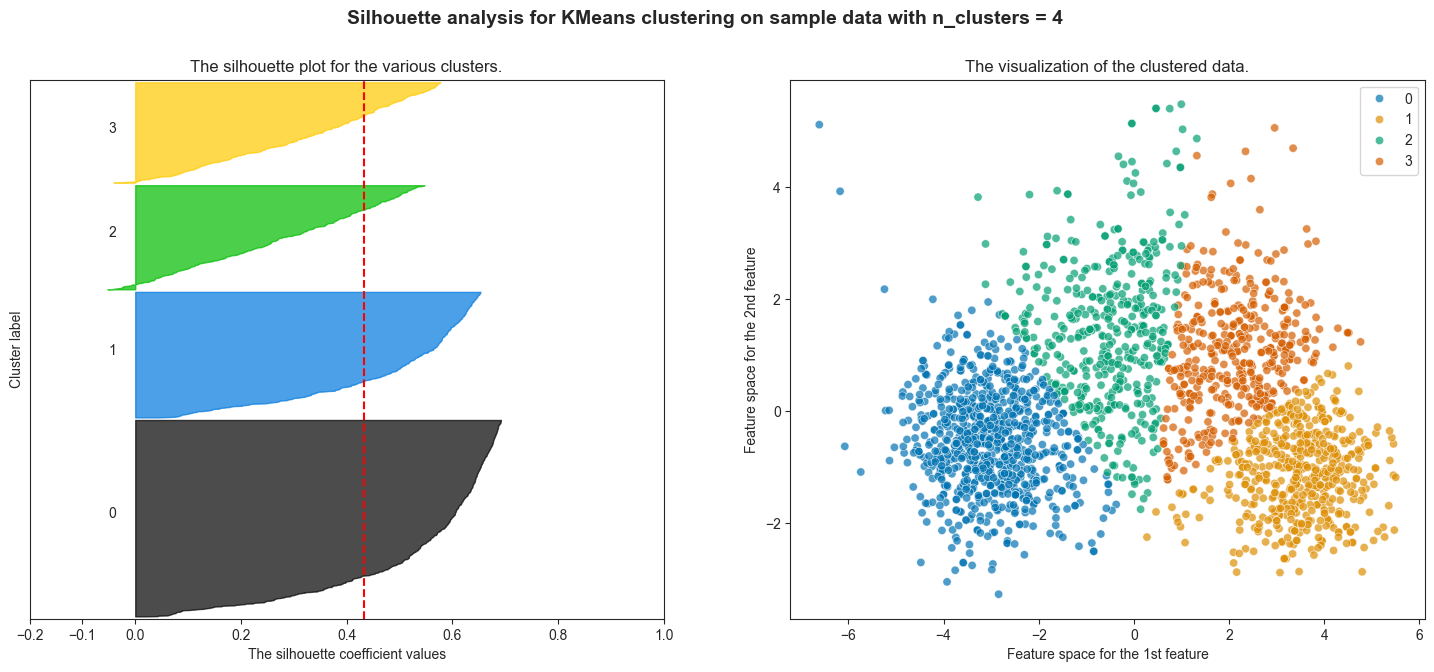

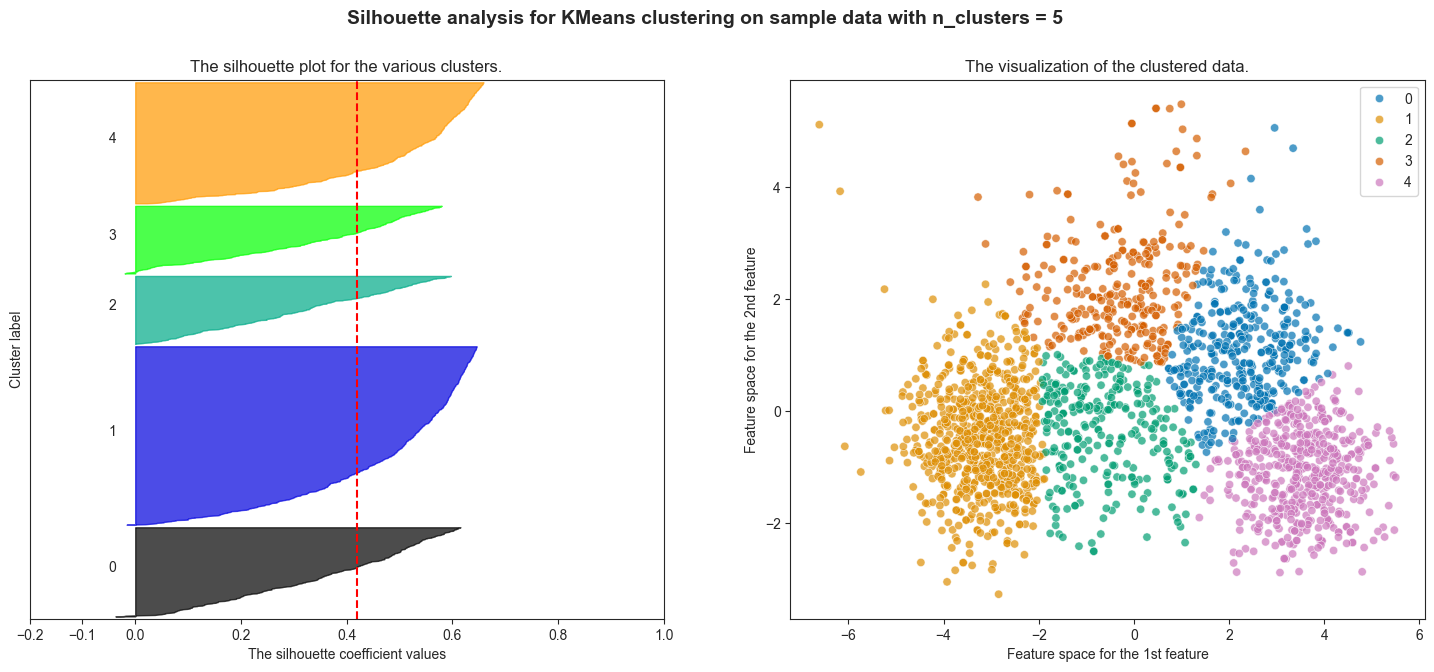

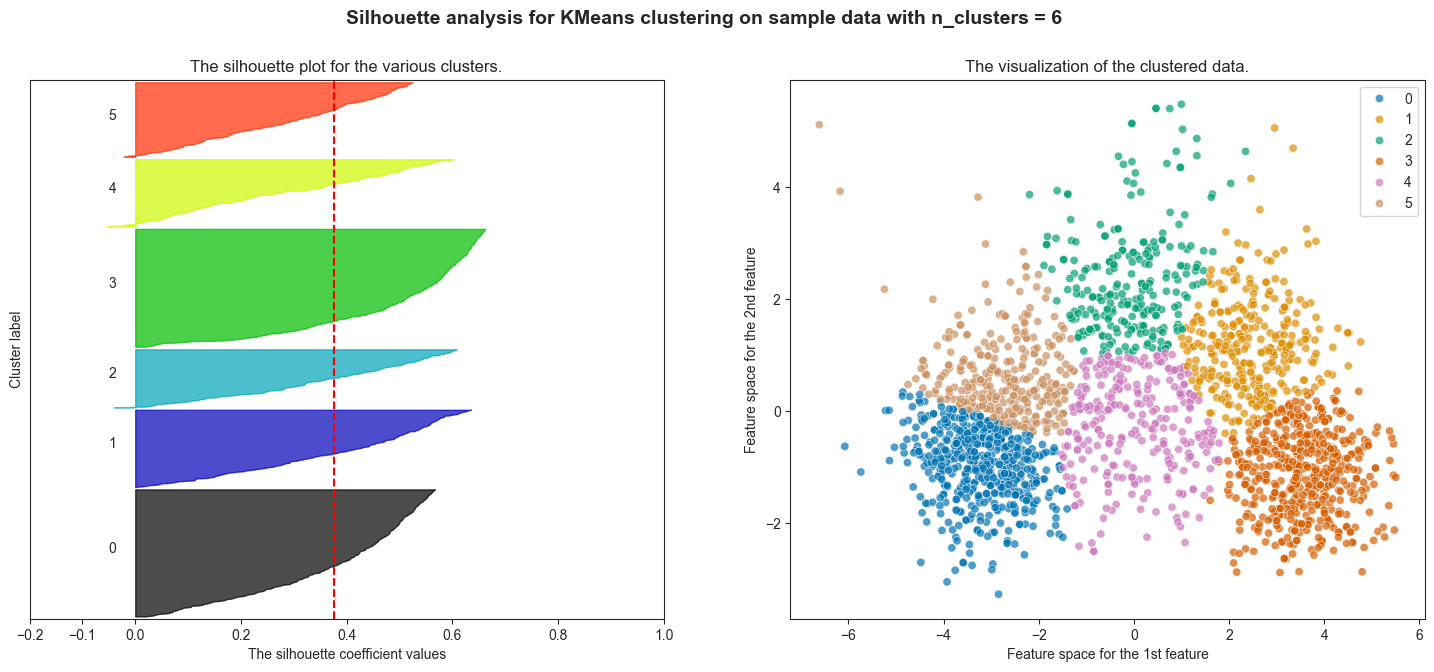

In [22]:
# plotting silhouette score for KMean
# Here pcadf is pca dataframe, and reduced is array of data after PCA.

sns.set_style('ticks')
silhouette_plot(KMeans, range(2,7), pcadf, reduced)

Reports:

Clusters of 3 has a good balance of inertia and silhouette-score, so we can go with clusters=3

In [23]:
# model-building

model = KMeans(n_clusters=3).fit(pcadf)
model_label = model.labels_
model_centers = model.cluster_centers_

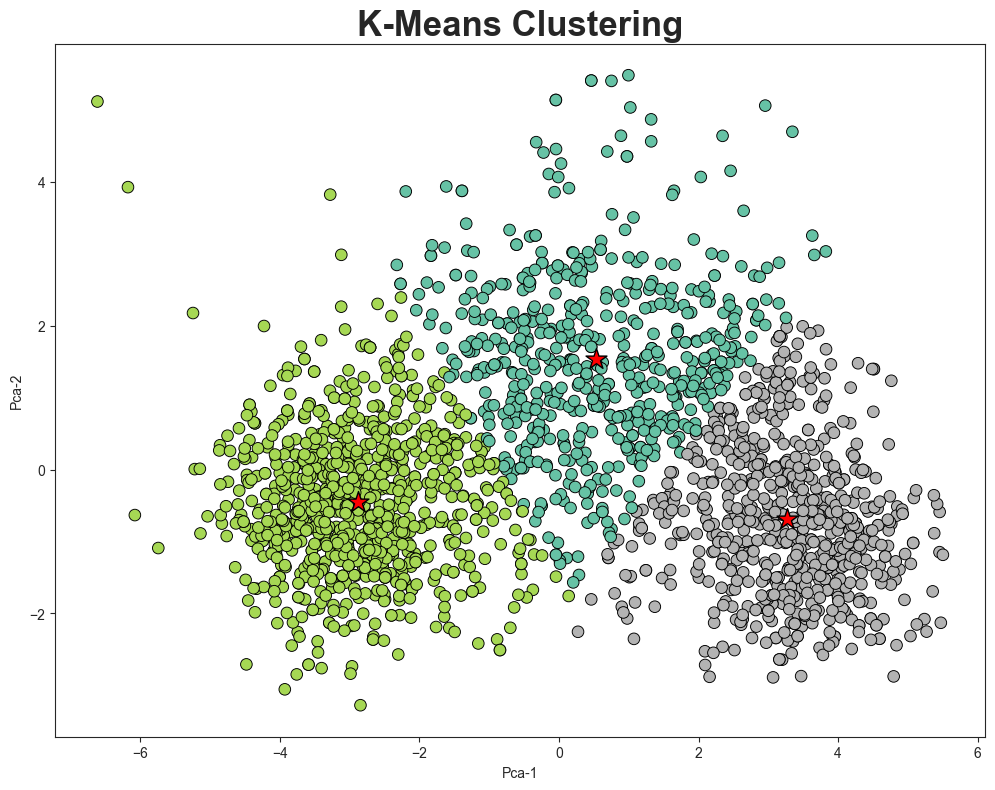

In [24]:
# plotting the k-means
plt.figure(figsize=(12,9))

sns.scatterplot(data=pcadf, x = 'PC1', y='PC2', c = model_label, s=70, cmap='Set2', ec ='black')

plt.title('K-Means Clustering', weight="bold", fontsize=25)
plt.xlabel('Pca-1')
plt.ylabel('Pca-2')

plt.scatter(model_centers[:,0], model_centers[:,1], c='red', marker='*', s=250, edgecolor='black')
plt.show()

# Agglomerative - Clustering

For n_clusters = 2 The average silhouette_score is : 0.5289568662296893
For n_clusters = 3 The average silhouette_score is : 0.4549176455625806
For n_clusters = 4 The average silhouette_score is : 0.42082886385425106
For n_clusters = 5 The average silhouette_score is : 0.32623047413980394
For n_clusters = 6 The average silhouette_score is : 0.32075570904435236
For n_clusters = 7 The average silhouette_score is : 0.3026284057909487


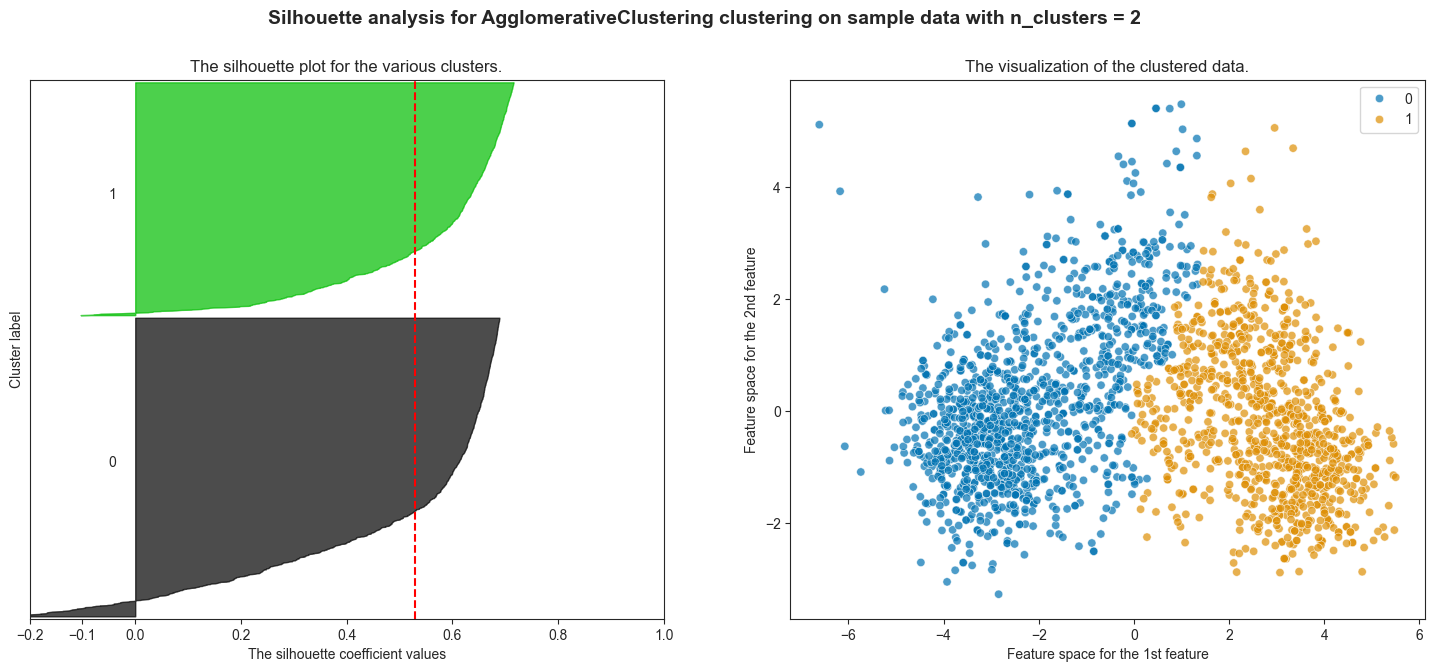

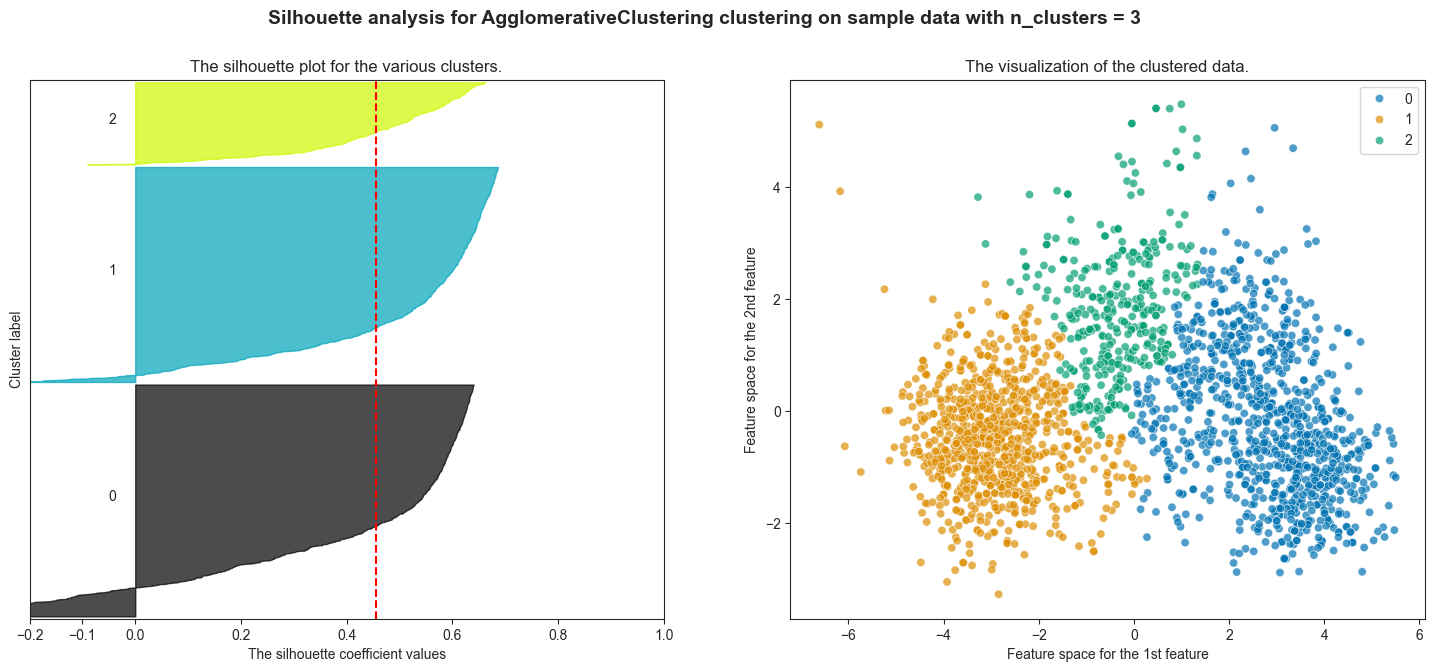

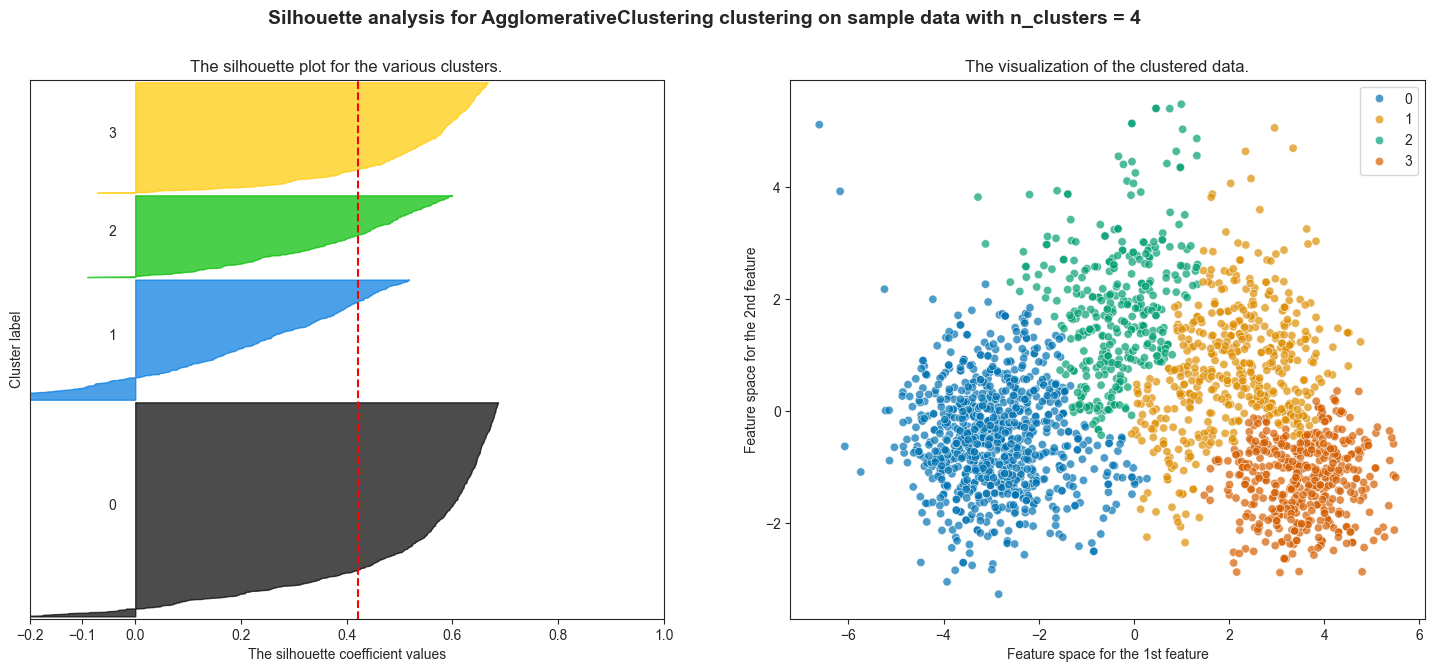

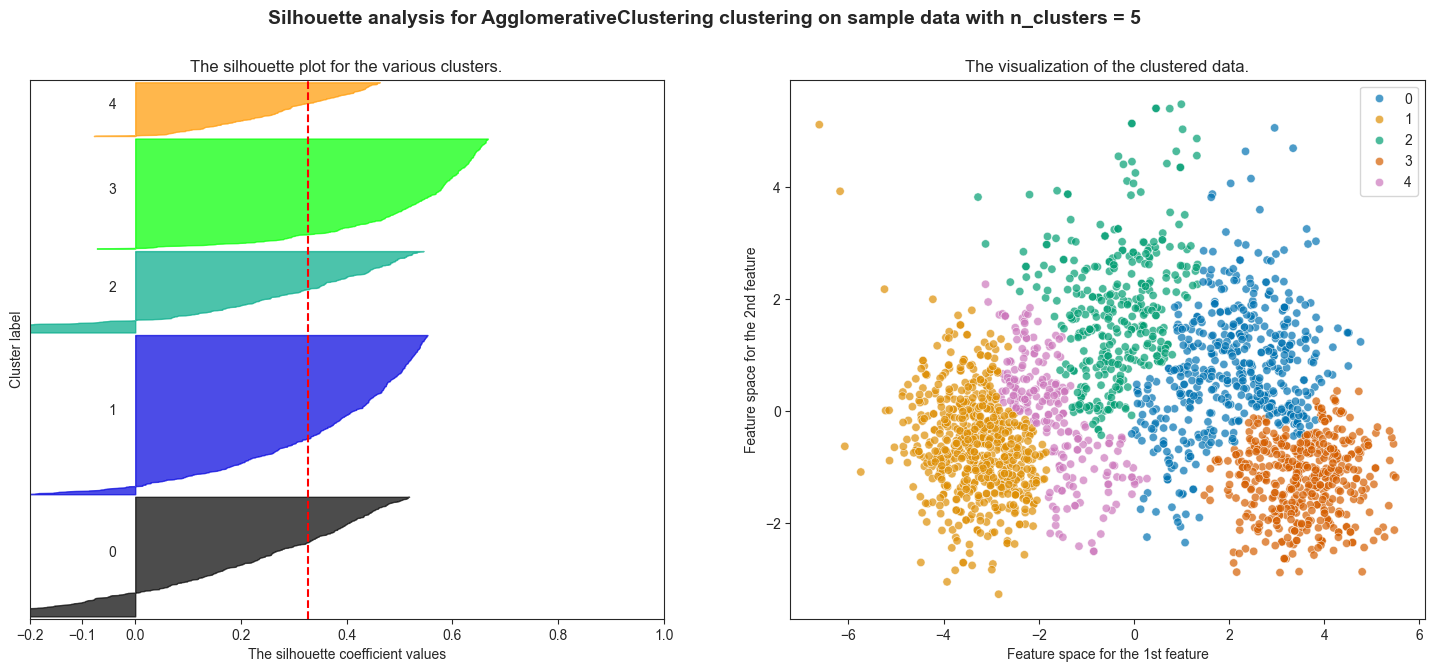

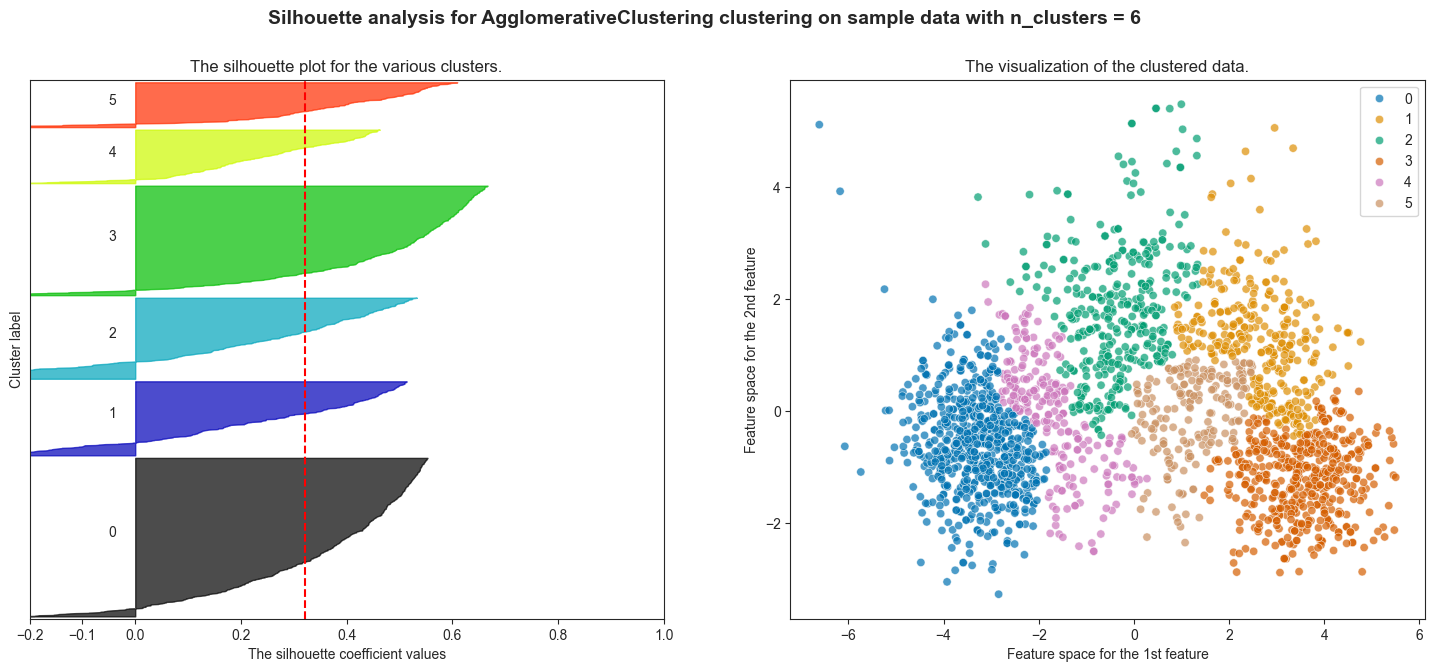

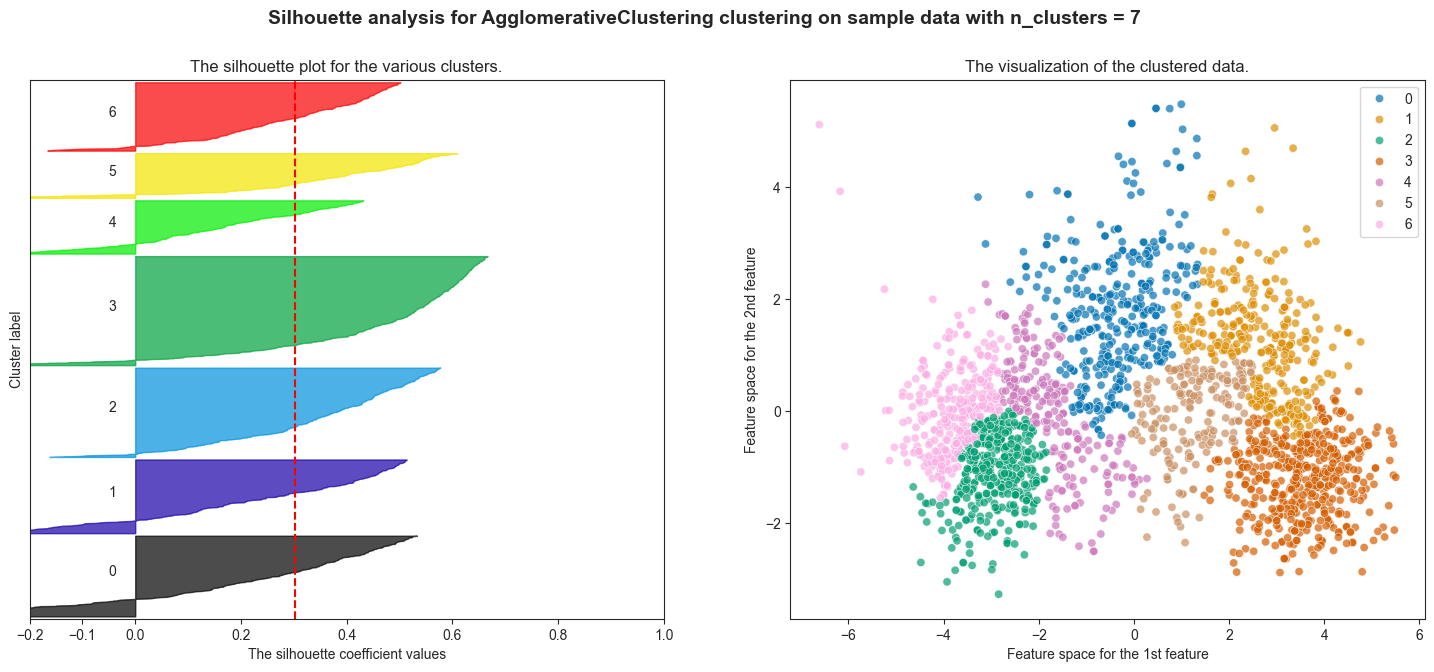

In [25]:
from sklearn.cluster import AgglomerativeClustering

silhouette_plot(AgglomerativeClustering, range(2,8), pcadf, reduced)

# Cluster = 2 , has a good balance of silhouette score and inertia

In [26]:
model = AgglomerativeClustering(n_clusters=2, linkage='ward').fit(reduced)
model_label = model.labels_

Text(0, 0.5, 'pca-2')

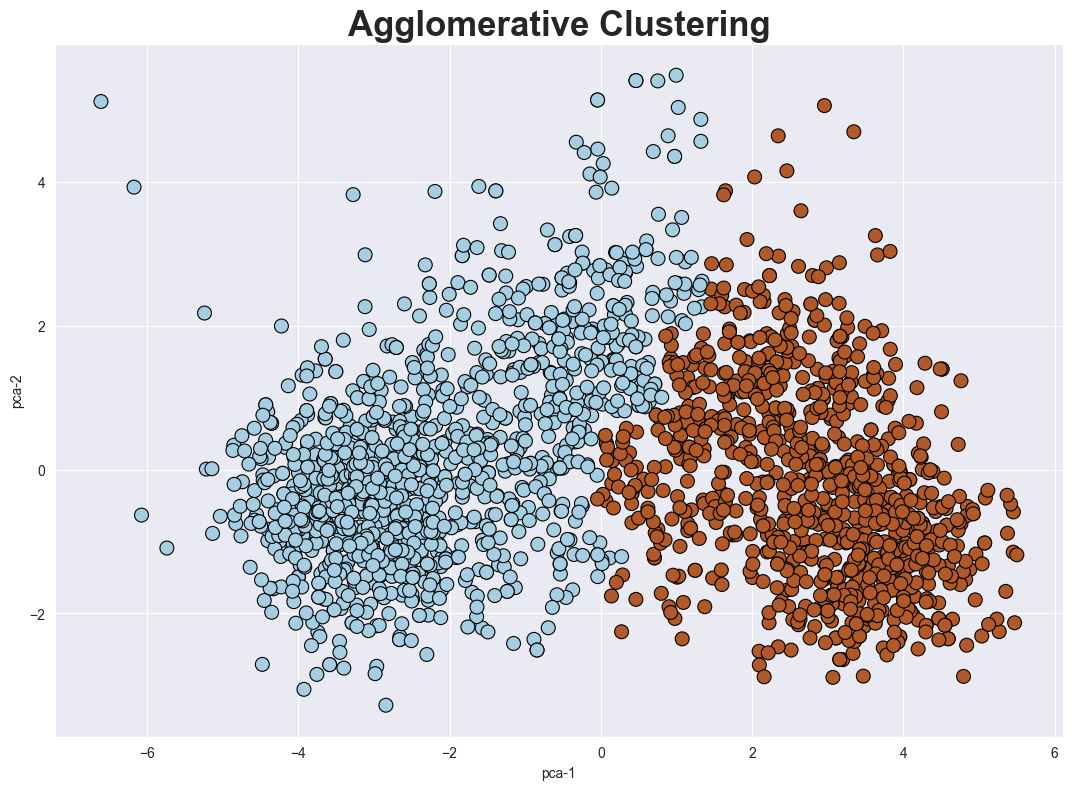

In [27]:
plt.figure(figsize=(13,9))

sns.set_style('darkgrid')
sns.scatterplot(data=pcadf, x='PC1', y='PC2', c=model_label, s=100, cmap='Paired', edgecolor='black')
plt.title("Agglomerative Clustering", weight='bold', fontsize=25)
plt.xlabel('pca-1')
plt.ylabel('pca-2')


# Gussian-Mixture Clustering

For n_clusters = 2 The average silhouette_score is : 0.5222823935156033
For n_clusters = 3 The average silhouette_score is : 0.47113672472226636
For n_clusters = 4 The average silhouette_score is : 0.4285335961730849
For n_clusters = 5 The average silhouette_score is : 0.4252065042941047
For n_clusters = 6 The average silhouette_score is : 0.35758617735470444
For n_clusters = 7 The average silhouette_score is : 0.3470762703450196


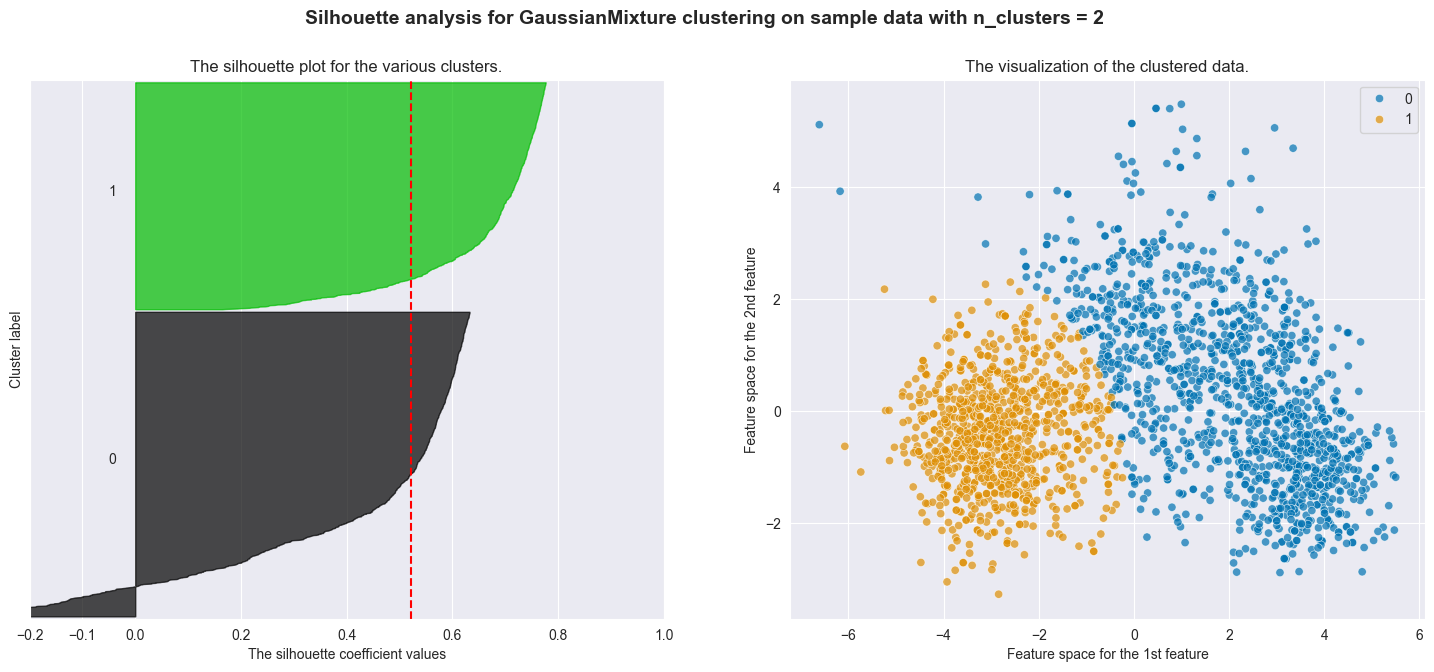

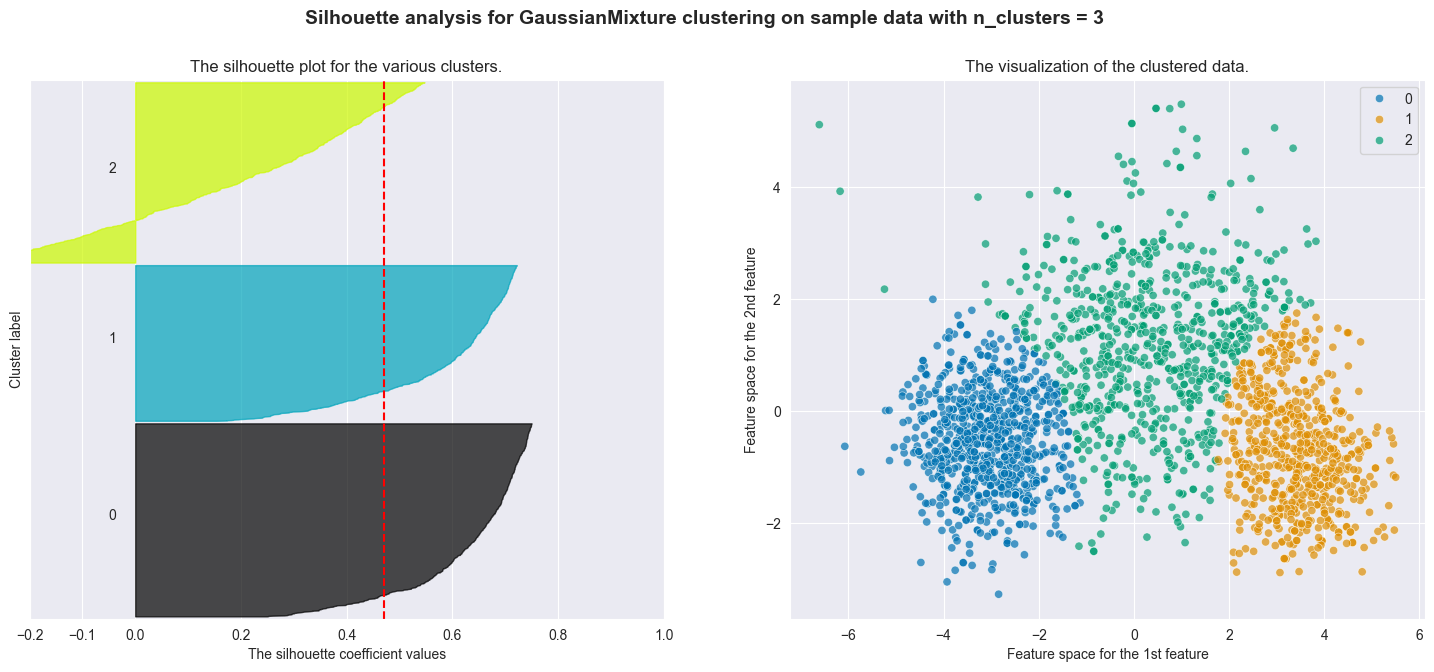

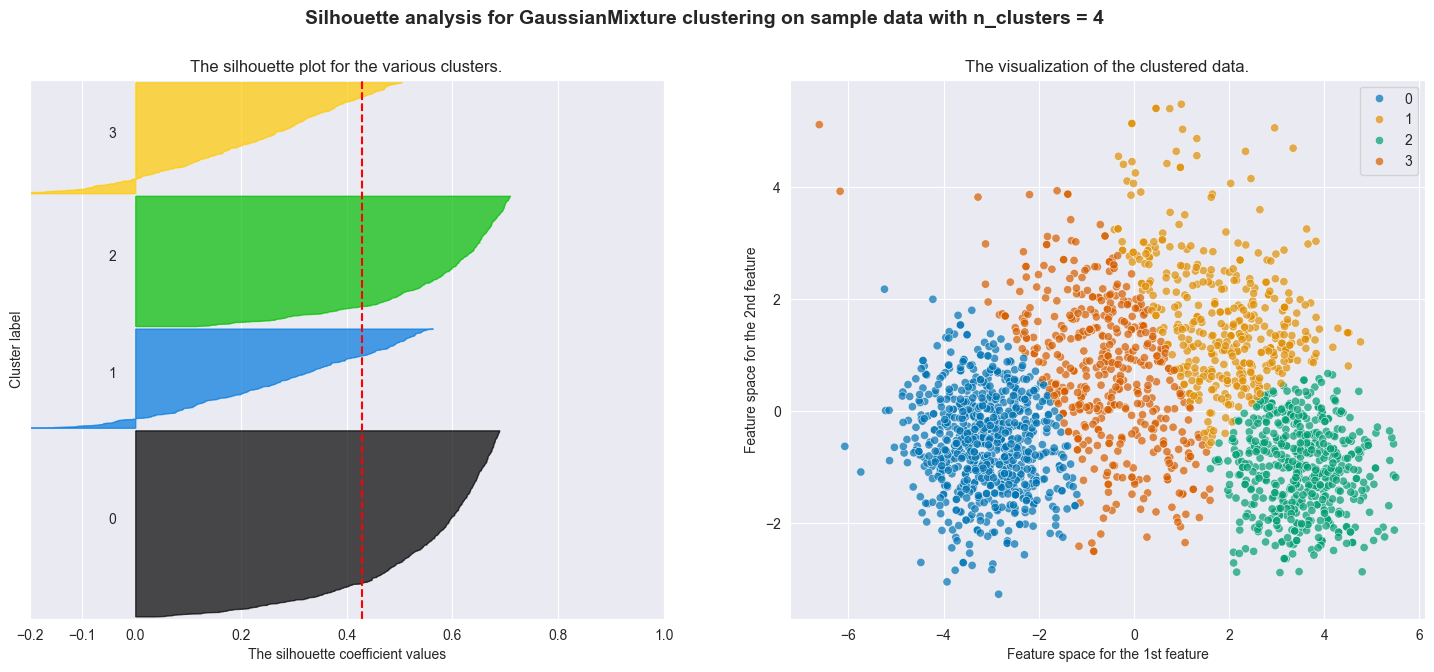

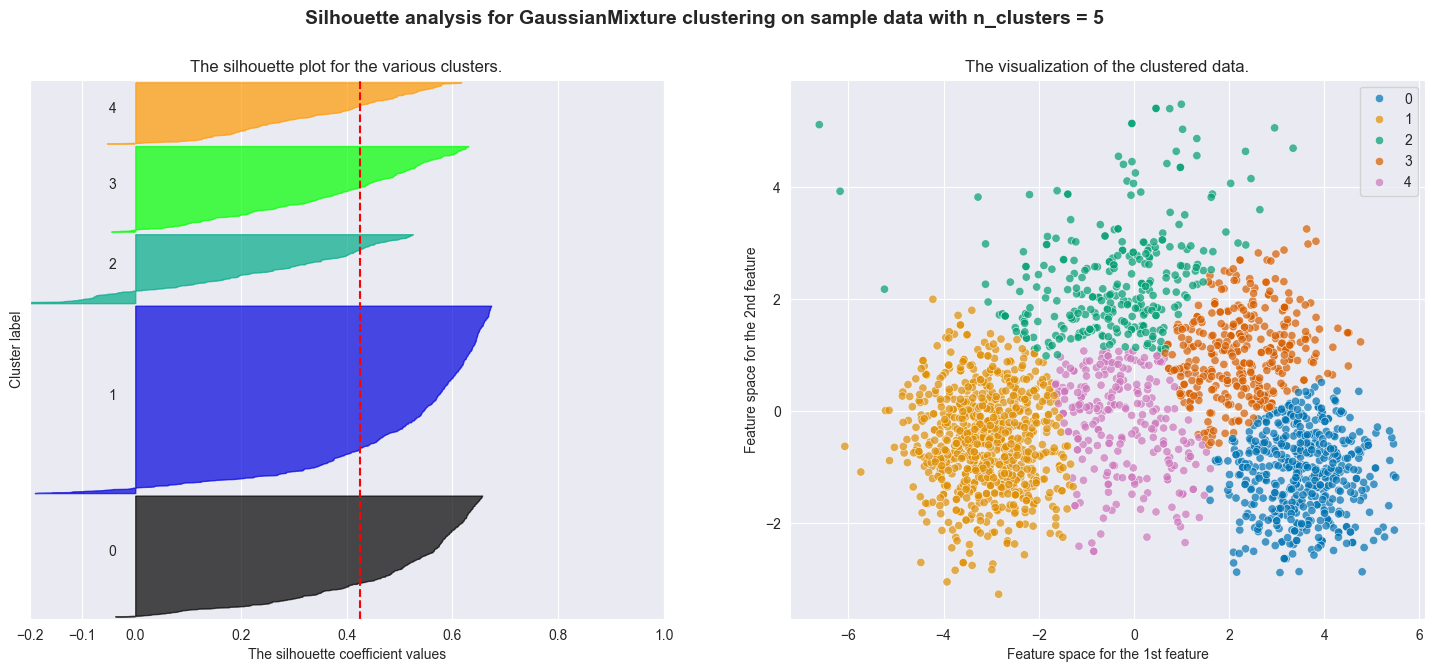

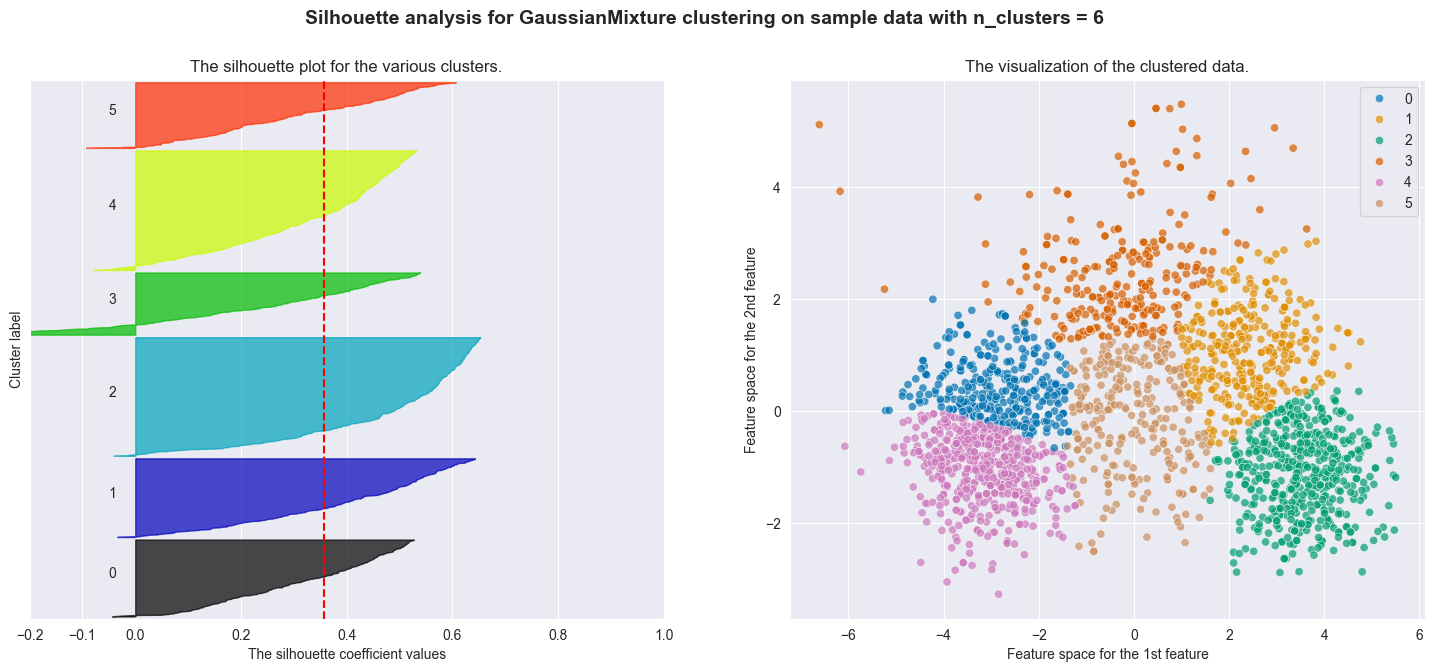

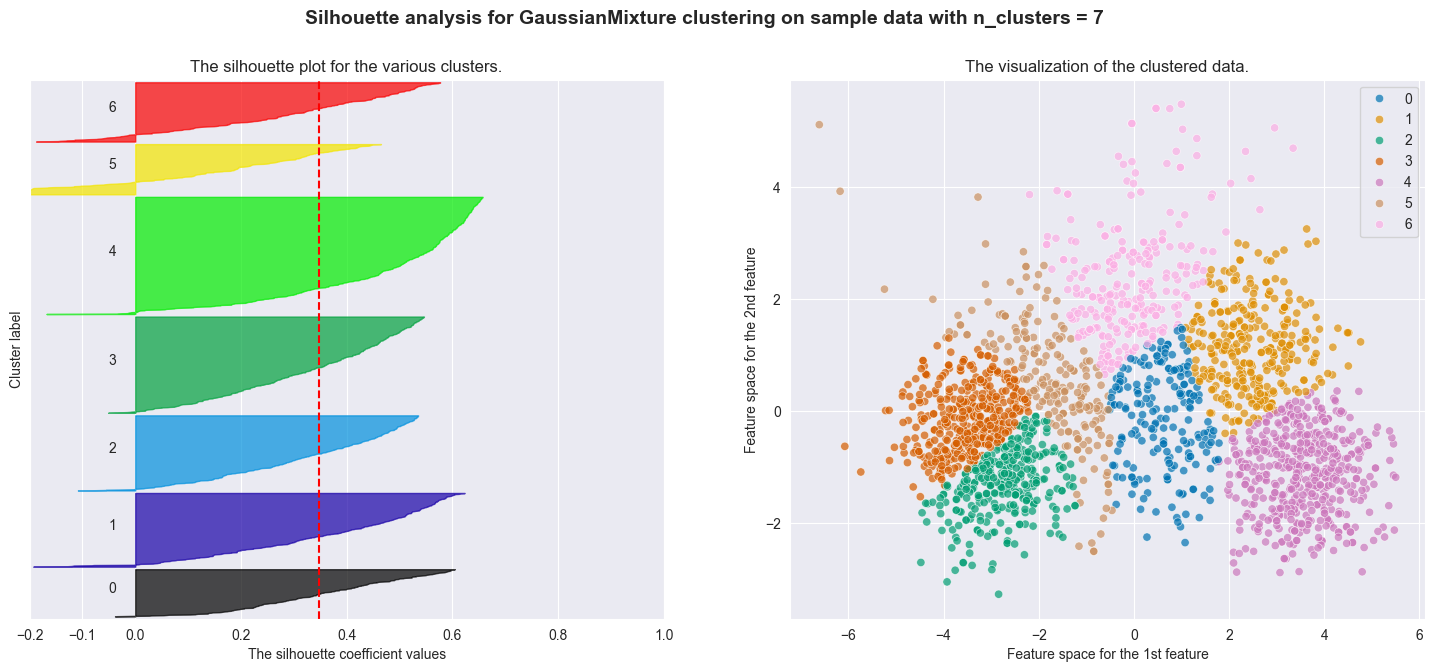

In [28]:
from sklearn.mixture import GaussianMixture

silhouette_plot(GaussianMixture, range(2,8), pcadf, reduced)

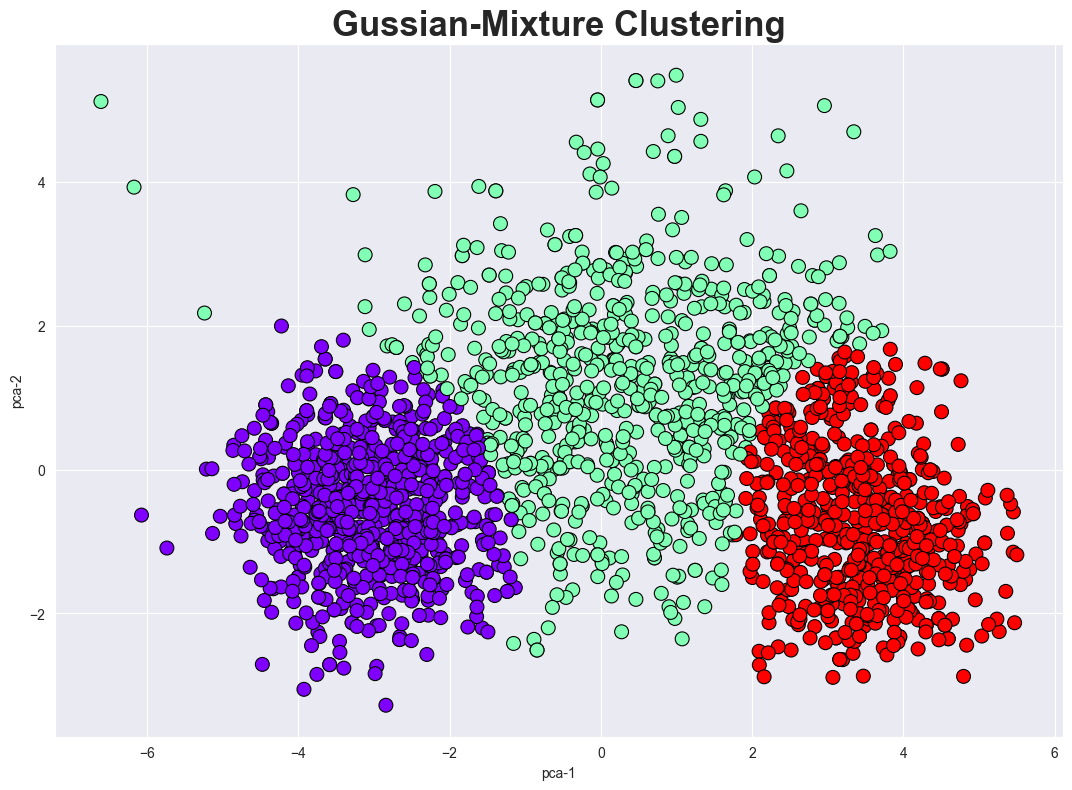

In [29]:
model = GaussianMixture(n_components=3, random_state=1).fit(reduced)
model_label = model.predict(reduced)

plt.figure(figsize=(13,9))
sns.scatterplot(data=pcadf, x='PC1', y='PC2', c=model_label, s=100, edgecolor='black', cmap='rainbow')
plt.title('Gussian-Mixture Clustering', weight='bold', fontsize=25)
plt.xlabel('pca-1')
plt.ylabel('pca-2')
plt.show()

# DBSCAN Clustering

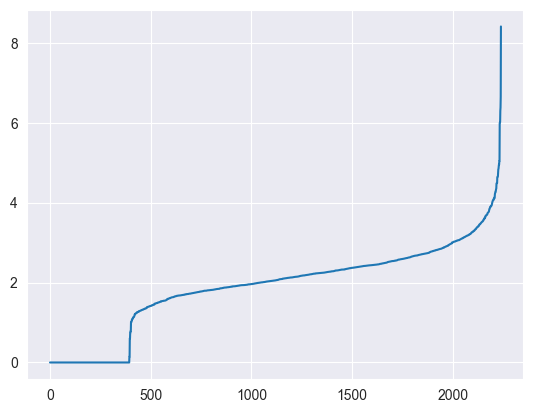

In [30]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

neighbours = NearestNeighbors(n_neighbors=17)
neighbours_fit = neighbours.fit(df_scaled)

distance, indices = neighbours_fit.kneighbors(df_scaled)

distance = np.sort(distance, axis=0)
distance = distance[:,1]
plt.plot(distance)
plt.show()

<Figure size 500x500 with 0 Axes>

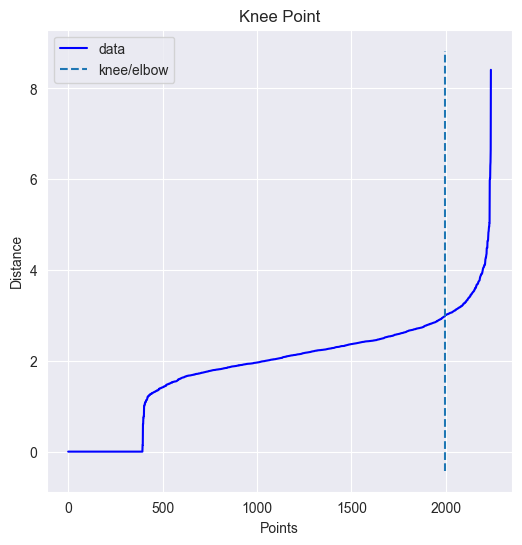

knee Locater k =  3.005446423166031


In [31]:
from kneed import KneeLocator

i = np.arange(len(distance))
knee = KneeLocator(i,distance, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig =  plt.figure(figsize=(5,5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
plt.show()
k = distance[knee.knee]
print("knee Locater k = ",k)

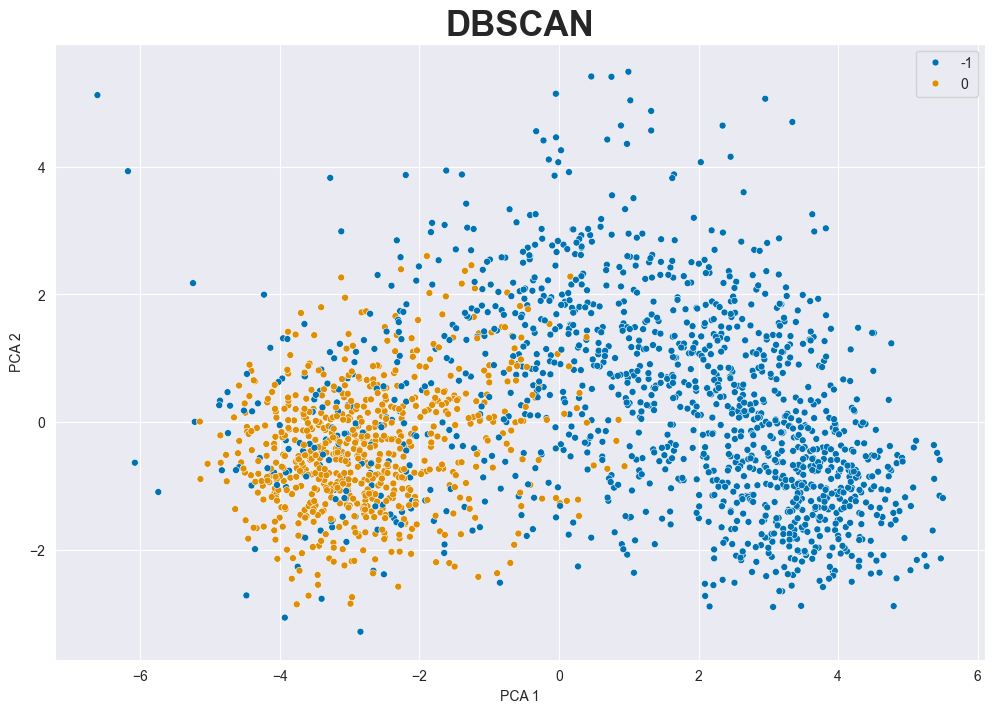

In [32]:
model=DBSCAN(eps=k , min_samples=65).fit(df_scaled)
model_label = model.labels_
plt.figure(figsize=(12,8))

plt.title('DBSCAN', weight="bold", fontsize=25)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
scatter = sns.scatterplot(x = reduced[:,0], y = reduced[:,1], hue= model_label,
                      palette=sns.color_palette("colorblind", len(set(model_label))), s=25)

# DBSCAN didn't perform well in Clustering

* Therefore, KMeans perform well in-comparison to others . so we will go with K-means clustering

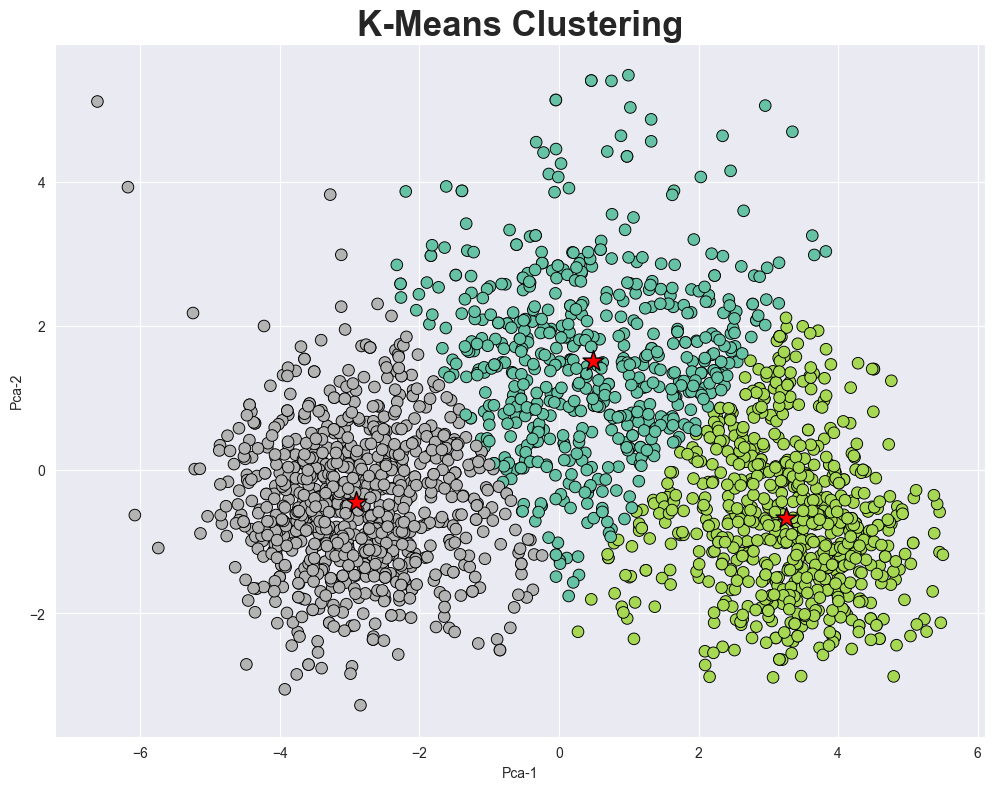

In [33]:
model = KMeans(n_clusters=3).fit(pcadf)
model_label = model.labels_
model_centers = model.cluster_centers_
plt.figure(figsize=(12,9))

sns.scatterplot(data=pcadf, x = 'PC1', y='PC2', c = model_label, s=70, cmap='Set2', ec ='black')

plt.title('K-Means Clustering', weight="bold", fontsize=25)
plt.xlabel('Pca-1')
plt.ylabel('Pca-2')

plt.scatter(model_centers[:,0], model_centers[:,1], c='red', marker='*', s=250, edgecolor='black')
plt.show()

In [ ]:
import os
df['Cluster'] = model.labels_.astype(int)
os.makedirs('data',exist_ok=False)
df.to_csv("./data/clustered_data.csv", index=False)